In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Datasets/
import pandas as pd
df = pd.read_csv('processed.cleveland.data')

/content/drive/MyDrive/Datasets


In [5]:
df.columns = ['Age (Years)', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure (mmHg)', 'Serum Cholesterol (mmHg)', 'Fasting Blood Sugar > 120 mg/dL', 'Resting Electrocardiographic Results', 'Maximum Heart Rate Achieved', 'Exercise-Induced Angina', 'ST Depression Induced by Exercise Relative to Rest', 'Slope of the Peak Exercise ST Segment','Number of Major Vessels Colored by Fluoroscopy', 'Thalassemia', 'Diagnosis of Heart Disease']

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import QuantileTransformer

# Load the test data
df = pd.read_csv('processed.cleveland.data', header=None)
df.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG',
              'MaxHR', 'ExerciseAngina', 'Oldpeak', 'STslope', 'MajorVessels', 'Thal', 'Target']
df.replace('?', np.nan, inplace=True)
df = df.astype(float)
df.dropna(inplace=True)
X_test = df.iloc[:, :13].values
y_test = df.iloc[:, 13].values

# Normalize the test data
scaler = QuantileTransformer(n_quantiles=df.shape[0], output_distribution="uniform", random_state=1111)
X_test = scaler.fit_transform(X_test)

# Load the 5 autoencoder models
model_filenames = ["NoHyperparameter.h5", "Hyperparameter.h5", "EarlyStopHyperparameter.h5", "ExtraHiddenLayer.h5", "OneLessHiddenLayer.h5"]
models = []
for model_filename in model_filenames:
    model = tf.keras.models.load_model(model_filename)
    models.append(model)

# Evaluate the FMSE of each model on the test data
fmse_scores = []
for model, model_filename in zip(models, model_filenames):
    y_pred = model.predict(X_test)
    fmse = np.mean(np.square(X_test - y_pred))
    fmse_scores.append(fmse)
    print(f"{model_filename} FMSE score: {fmse:.5f}")

# Compare the performances of the models
best_model_index = np.argmin(fmse_scores)
print(f"Best model is {model_filenames[best_model_index]}") 


10/10 [==============================] - 0s 3ms/step
NoHyperparameter.h5 FMSE score: 0.03094
10/10 [==============================] - 0s 3ms/step
Hyperparameter.h5 FMSE score: 0.02946
10/10 [==============================] - 0s 3ms/step
EarlyStopHyperparameter.h5 FMSE score: 0.03309
10/10 [==============================] - 0s 2ms/step
ExtraHiddenLayer.h5 FMSE score: 0.02791
10/10 [==============================] - 0s 2ms/step
OneLessHiddenLayer.h5 FMSE score: 0.02744
Best model is OneLessHiddenLayer.h5


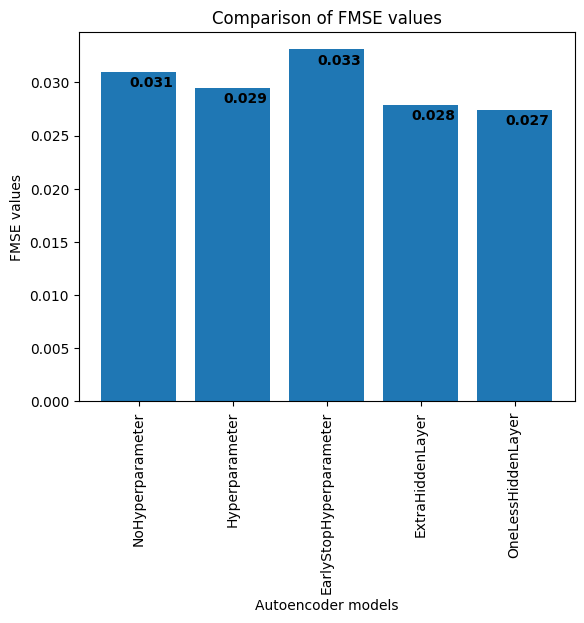

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define the FMSE values of each model
fmse_values = [fmse_scores[0], fmse_scores[1], fmse_scores[2], fmse_scores[3], fmse_scores[4]]

# Define the names of each model
model_names = ['NoHyperparameter', 'Hyperparameter', 'EarlyStopHyperparameter', 'ExtraHiddenLayer', 'OneLessHiddenLayer']

# Set the plot title and axis labels
plt.title('Comparison of FMSE values')
plt.xlabel('Autoencoder models')
plt.ylabel('FMSE values')

# Create the bar chart
plt.bar(model_names, fmse_values)

# Add FMSE values to the bars
fmse_min = np.min(fmse_values)
for i, v in enumerate(fmse_values):
    plt.text(i-0.1, v-(fmse_min*0.05), str(np.round(v, 3)), fontweight='bold')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()





In [25]:
from tensorflow.keras.models import load_model

model_names = ['NoHyperparameter', 'Hyperparameter', 'EarlyStopHyperparameter', 'ExtraHiddenLayer', 'OneLessHiddenLayer']

models = []

for name in model_names:
    model_path = f"{name}.h5"
    model = load_model(model_path)
    models.append(model)





In [32]:
from tensorflow.keras.models import load_model

model_names = ['NoHyperparameter', 'Hyperparameter', 'EarlyStopHyperparameter', 'ExtraHiddenLayer', 'OneLessHiddenLayer']

models = []

for name in model_names:
    model_path = f"{name}.h5"
    model = load_model(model_path)
    models.append(model)

import matplotlib.pyplot as plt

# Plot the training and validation loss for each model
for i, model in enumerate(models):
    plt.plot(model.history.history['loss'], label=f'Training Loss ({model_names[i]})')
    plt.plot(model.history.history['val_loss'], label=f'Validation Loss ({model_names[i]})')
    
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

# Reset the 'models' list
models = []




AttributeError: ignored

NameError: ignored